In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import TweetTokenizer

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Case Studies/sentiment_analysis/twcs.csv')

## 1. Basic Stats

In [ ]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [ ]:
data['created_at'] =  pd.to_datetime(data.created_at)
print('Timestamp range of tweets: {} to {}'.format(data.created_at.min().date(), data.created_at.max().date()))

Timestamp range of tweets: 2008-05-08 to 2017-12-03


## 2. Service providers and Inbound Customers

In [ ]:
inbound_filter = data.inbound == True
inbound = data[inbound_filter].copy()
service_providers = data[~inbound_filter].copy()

In [ ]:
print('Unique inbound requests from customers: ',len(inbound.author_id.unique()))

Unique inbound requests from customers:  702669


In [ ]:
print('Unique service providers: ',len(service_providers.author_id.unique()))

Unique service providers:  108


In [ ]:
for author in service_providers.author_id.unique():
  print(author)

sprintcare
Ask_Spectrum
VerizonSupport
ChipotleTweets
AskPlayStation
marksandspencer
MicrosoftHelps
ATVIAssist
AdobeCare
AmazonHelp
XboxSupport
AirbnbHelp
nationalrailenq
AirAsiaSupport
Morrisons
NikeSupport
AskAmex
McDonalds
YahooCare
AskLyft
UPSHelp
Delta
AppleSupport
Uber_Support
Tesco
SpotifyCares
British_Airways
comcastcares
AmericanAir
TMobileHelp
VirginTrains
SouthwestAir
AskeBay
hulu_support
GWRHelp
sainsburys
AskPayPal
HPSupport
ChaseSupport
CoxHelp
DropboxSupport
VirginAtlantic
BofA_Help
AzureSupport
AlaskaAir
ArgosHelpers
Postmates_Help
AskTarget
GoDaddyHelp
CenturyLinkHelp
AskPapaJohns
SW_Help
askpanera
Walmart
USCellularCares
AsurionCares
GloCare
idea_cares
DoorDash_Help
NeweggService
VirginAmerica
Safaricom_Care
DunkinDonuts
Ask_WellsFargo
O2
TfL
asksalesforce
airtel_care
Kimpton
AskCiti
IHGService
LondonMidland
JetBlue
BoostCare
JackBox
AldiUK
HiltonHelp
GooglePlayMusic
OfficeSupport
KFC_UKI_Help
DellCares
TwitterSupport
GreggsOfficial
ATT
TacoBellTeam
AskRBC
ArbysCares


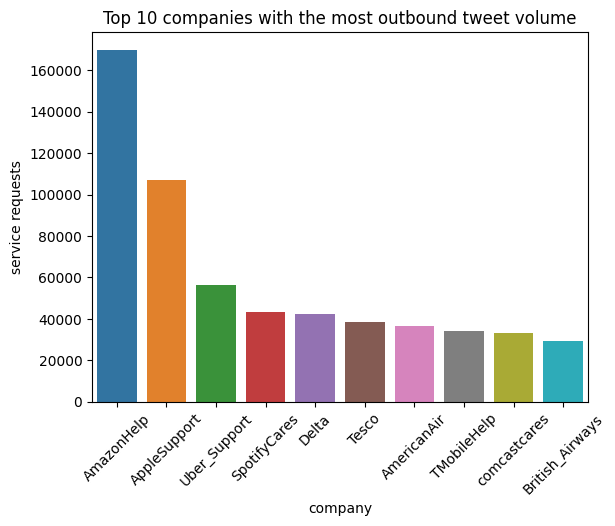

In [ ]:
## service provider wise outbound tweet volume
service_author_names = service_providers.author_id.unique()
service_10 = data[data.author_id.isin(service_author_names)]['author_id'].value_counts().nlargest(10)
sns.barplot(x=service_10.index, y=service_10.values)

plt.title('Top 10 companies with the most outbound tweet volume')
plt.xlabel('company')
plt.ylabel('service requests')
plt.xticks(rotation=45)

plt.show()

## 3. Saving inbound and service provider's data

In [ ]:
service_providers.author_id.to_csv('service_provider_authors.csv')

In [ ]:
## service provider wise min-time, max-time
## service provider/time wise no. of tweets

In [ ]:
inbound.author_id = inbound.author_id.astype('int')
inbound.text = inbound.text.astype('string')
inbound.to_csv('inbound.csv')
inbound.to_parquet('inbound.gzip', compression='gzip')

In [ ]:
service_providers.text = service_providers.text.astype('string')

In [ ]:
service_providers.to_csv('service_providers.csv')
service_providers.to_parquet('service_providers.gzip', compression='gzip')

## Some example conversations

In [ ]:
data[data['author_id']=='115712']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0
6,8,115712,True,2017-10-31 21:45:10+00:00,@sprintcare is the worst customer service,"9,6,10",NaN
750,1292,115712,True,2017-10-31 22:30:09+00:00,@sprintcare I've sent several private messages...,1294,1291.0
752,1295,115712,True,2017-10-31 22:34:55+00:00,@sprintcare I sent it twice now to apparently ...,NaN,1294.0
753,1293,115712,True,2017-10-31 22:24:51+00:00,@115714 @sprintcare how can I get in touch wit...,"1291,1296,1297",NaN
2298,3185,115712,True,2017-10-31 22:47:02+00:00,@sprintcare complete ineptness!,3184,3186.0
2299,3186,115712,True,2017-10-31 22:46:48+00:00,@sprintcare I am not surprised because nothing...,3185,3187.0
2301,3188,115712,True,2017-10-31 22:43:47+00:00,@116447 - And the issue is still not fixed! N...,3187,NaN


In [ ]:
print(data[data['tweet_id']==3188].text.values)

['@116447 - And the issue is still not fixed!  No one can help!  All the info I get is wrong!  I have been a customer for 12 yrs! https://t.co/MQIImu0yiR']


In [ ]:
data[data['author_id']=='823869']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2811770,2987948,823869,True,2017-11-22 08:35:16+00:00,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN


In [ ]:
data[data['author_id']=='823870']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2811773,2987950,823870,True,2017-11-21 22:01:04+00:00,@AldiUK warm sloe gin mince pies with ice cre...,"2987951,2987949",NaN


## Mapping users to Service porviders

In [ ]:
# Extract the first occurrence of a username as an @mention
inbound['service_provider'] = inbound['text'].str.extract(r'@(\w+)')

In [ ]:
inbound['service_provider'].value_counts(dropna=False)

AmazonHelp      126750
AppleSupport     85726
NaN              56236
AmericanAir      44721
Uber_Support     41394
                 ...  
491180               1
235998               1
491200               1
491199               1
45468                1
Name: service_provider, Length: 61250, dtype: int64

## Service providers mentioned in inbound requests

In [ ]:
inbound_sp = inbound[inbound.service_provider.isin(service_providers.author_id)]
inbound_sp

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,service_provider
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,sprintcare
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,sprintcare
6,8,115712,True,2017-10-31 21:45:10+00:00,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare
8,12,115713,True,2017-10-31 22:04:47+00:00,@sprintcare You gonna magically change your co...,"11,13,14",15.0,sprintcare
...,...,...,...,...,...,...,...,...
2811761,2987940,783956,True,2017-11-22 07:15:45+00:00,@Safaricom_Care It's almost clocking 24hrs sin...,NaN,2811285.0,Safaricom_Care
2811763,2987942,823867,True,2017-11-22 07:30:39+00:00,Hai @AirAsiaSupport #asking how many days need...,2987941,NaN,AirAsiaSupport
2811765,2987944,823868,True,2017-11-22 07:43:36+00:00,@AirAsiaSupport \n\nI am unable to do web chec...,2987943,NaN,AirAsiaSupport
2811768,2987946,524544,True,2017-11-22 08:25:48+00:00,@VirginTrains Hope you are well? Does the 9.30...,2987945,NaN,VirginTrains


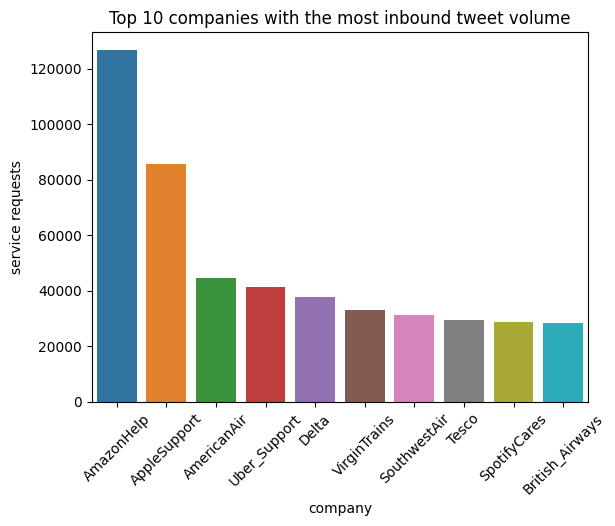

In [ ]:
## service provider wise inbound tweet volume
inbound_sp_10 = inbound_sp.service_provider.value_counts().nlargest(10)
sns.barplot(x=inbound_sp_10.index, y=inbound_sp_10.values)

plt.title('Top 10 companies with the most inbound tweet volume')
plt.xlabel('company')
plt.ylabel('service requests')
plt.xticks(rotation=45)

plt.show()

## Tweets mapped to unknown service providers

In [ ]:
inbound_sp_na = inbound[inbound['service_provider'].isna()]
inbound_sp_na

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,service_provider
23,29,115716,True,2017-10-31 22:01:35+00:00,actually that's a broken link you sent me and ...,28,NaN,NaN
187,272,115770,True,2017-11-22 09:14:39+00:00,amazonのfireTVstickが見れない😢,269,NaN,NaN
204,293,115769,True,2017-10-18 14:07:45+00:00,Whoa! Come along with Lightroom’s own Ben Ward...,292,NaN,NaN
235,325,115792,True,2017-11-22 08:55:35+00:00,amazonプライムビデオ、再生エラーが多いです,324,NaN,NaN
255,348,115798,True,2011-08-29 03:20:05+00:00,"Lost your booking number? No worries, just dro...","349,350,351,352,347,353,354,355,356,357,358,35...",NaN,NaN
...,...,...,...,...,...,...,...,...
2811641,2987820,823830,True,2017-11-22 06:00:24+00:00,Amazonで注文したDVDがまだ届かない･･･\n昨日まで到着予定なんだけど問い合わせする...,2987819,NaN,NaN
2811643,2987822,823831,True,2017-11-22 06:10:09+00:00,たいへん！！Amazonでピンク動画見たら請求来た！！私の消息途絶えたらAmazonに社会か...,2987821,NaN,NaN
2811677,2987856,823842,True,2017-11-30 08:03:08+00:00,I was just dying to get home but the other peo...,2987855,NaN,NaN
2811722,2987901,823853,True,2017-11-22 07:07:30+00:00,架空請求きたよww\n\nしかとショートメールでAmazon相談係。 https://t.c...,2987900,NaN,NaN


## Tweets mapped to other users

In [ ]:
inbound_others = inbound[~(inbound.service_provider.isna() | inbound.service_provider.isin(service_providers.author_id))]
inbound_others

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,service_provider
12,18,115713,True,2017-10-31 19:56:01+00:00,@115714 y’all lie about your “great” connectio...,17,NaN,115714
14,20,115715,True,2017-10-31 22:03:34+00:00,"@115714 whenever I contact customer support, t...",19,NaN,115714
39,42,115721,True,2017-10-31 22:06:21+00:00,@115722 MD. And this was sent to the wrong add...,40,46.0,115722
40,46,115722,True,2017-10-31 22:04:29+00:00,"@115721 Hello Duke, Do you have a copy of your...",42,47.0,115721
41,47,115721,True,2017-10-31 22:01:42+00:00,@115722 Nobody can find my account or number. ...,46,48.0,115722
...,...,...,...,...,...,...,...,...
2811753,2987932,823863,True,2017-11-30 01:41:28+00:00,@115817 seriously ?? https://t.co/i7JhZaQuGg,2987931,NaN,115817
2811757,2987937,823865,True,2017-11-30 01:39:12+00:00,@115817 @UPSHelp Why does the tracking record ...,2987936,NaN,115817
2811759,2987939,823866,True,2017-11-22 07:41:45+00:00,いきなり来たんだけど\nなんですかこれ！！？\n\n@120465 https://t.co...,2987938,NaN,120465
2811770,2987948,823869,True,2017-11-22 08:35:16+00:00,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN,115714


## Pie chart of mapping of inbound messages

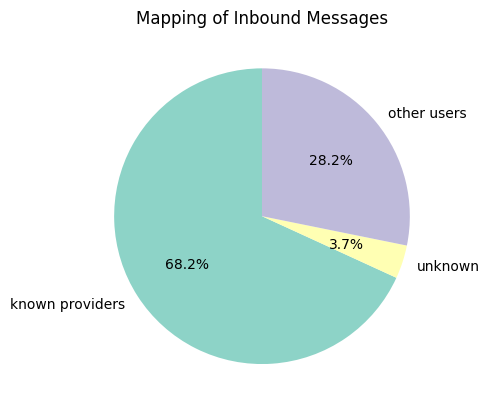

In [ ]:
sizes = [inbound_sp.shape[0],inbound_sp_na.shape[0],inbound_others.shape[0]]
labels = ['known providers', 'unknown', 'other users']
colors = sns.color_palette('Set3')  # Seaborn color palette
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Mapping of Inbound Messages')
plt.show()

## Preparing inbound data

In [ ]:
inbound.service_provider = inbound.service_provider.str.lower()
inbound

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,service_provider
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,sprintcare
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,sprintcare
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,sprintcare
6,8,115712,True,2017-10-31 21:45:10+00:00,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare
8,12,115713,True,2017-10-31 22:04:47+00:00,@sprintcare You gonna magically change your co...,"11,13,14",15.0,sprintcare
...,...,...,...,...,...,...,...,...
2811765,2987944,823868,True,2017-11-22 07:43:36+00:00,@AirAsiaSupport \n\nI am unable to do web chec...,2987943,NaN,airasiasupport
2811768,2987946,524544,True,2017-11-22 08:25:48+00:00,@VirginTrains Hope you are well? Does the 9.30...,2987945,NaN,virgintrains
2811770,2987948,823869,True,2017-11-22 08:35:16+00:00,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN,115714
2811771,2812240,121673,True,2017-11-23 04:13:07+00:00,@143549 @sprintcare You have to go to https://...,NaN,2812239.0,143549


## Examining AmazonHelp tweets

In [ ]:
amazonhelp_in = inbound[inbound.service_provider.isin(['amazonhelp'])].copy()
amazonhelp_out = data[data.author_id=='AmazonHelp'].copy()

In [ ]:
amazonhelp_ic = pd.DataFrame(amazonhelp_in['created_at'])
amazonhelp_ic['counts'] = 1
amazonhelp_ic = amazonhelp_ic.set_index('created_at').resample('M').sum()
amazonhelp_ic.head()

,counts
created_at,
2015-06-30 00:00:00+00:00,5
2015-07-31 00:00:00+00:00,1
2015-08-31 00:00:00+00:00,0
2015-09-30 00:00:00+00:00,0
2015-10-31 00:00:00+00:00,0


In [ ]:
amazonhelp_oc = pd.DataFrame(amazonhelp_out['created_at'])
amazonhelp_oc['counts'] = 1
amazonhelp_oc = amazonhelp_oc.set_index('created_at').resample('M').sum()
amazonhelp_oc.head()

,counts
created_at,
2015-06-30 00:00:00+00:00,4
2015-07-31 00:00:00+00:00,1
2015-08-31 00:00:00+00:00,0
2015-09-30 00:00:00+00:00,0
2015-10-31 00:00:00+00:00,0


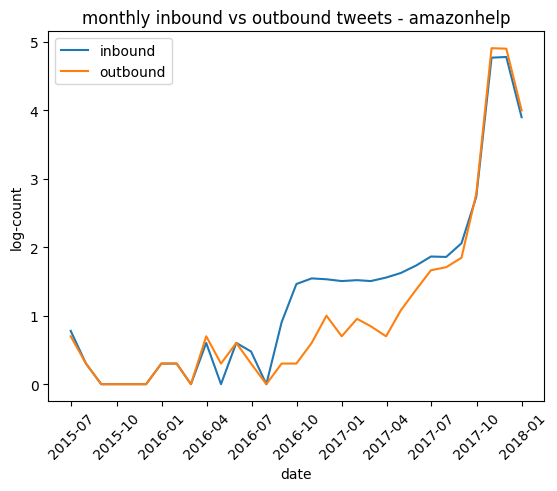

In [ ]:
sns.lineplot(data=np.log10(amazonhelp_ic['counts']+1), label='inbound')
sns.lineplot(data=np.log10(amazonhelp_oc['counts']+1), label='outbound')
plt.title('monthly inbound vs outbound tweets - amazonhelp')
plt.xlabel('date')
plt.ylabel('log-count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
amazonhelp_in.to_csv('/content/drive/MyDrive/Projects/Case Studies/sentiment_analysis/amazonhelp_in.csv')

In [ ]:
amazonhelp_in.shape

(127061, 8)

In [ ]:
amazonhelp_in.to_parquet('/content/drive/MyDrive/Projects/Case Studies/sentiment_analysis/amazonhelp_in.gzip')